In [34]:
import pandas as pd
df = pd.read_csv('polynomial_regression_data.csv')
df.head()

,sno,Temperature,Pressure
0,1,0.000000,0.000000e+00
1,2,1.010101,2.061220e-10
2,3,2.020202,1.648976e-09
3,4,3.030303,5.565295e-09
4,5,4.040404,1.319181e-08


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sno          100 non-null    int64  
 1   Temperature  100 non-null    float64
 2   Pressure     100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


<Axes: xlabel='Temperature', ylabel='Pressure'>

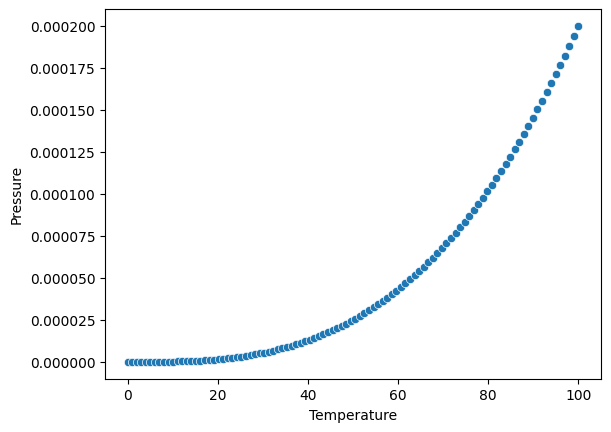

In [36]:
import seaborn as sns
sns.scatterplot(data=df, x='Temperature', y='Pressure')

In [37]:
X = df[['Temperature']]
y = df['Pressure']

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [47]:
from sklearn.linear_model import LinearRegression
poly_lr_model = LinearRegression()
poly_lr_model.fit(X_train_poly, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [48]:
y_pred = poly_lr_model.predict(X_test_poly)
y_pred[:5] #predicted output

array([1.17857897e-04, 3.06868295e-05, 7.06998564e-05, 1.87828700e-05,
       1.75582990e-05])

In [49]:
y_test[:5] #actual output

83    0.000118
53    0.000031
70    0.000071
45    0.000019
44    0.000018
Name: Pressure, dtype: float64

In [50]:
from sklearn.metrics import root_mean_squared_error, r2_score
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test,y_pred)
print(rmse,r2)

1.0988791454605036e-17 1.0


In [51]:
import numpy as np
X_range = np.linspace(X.min(),X.max(),100)
X_range_poly = poly.transform(X_range)
y_range_pred = poly_lr_model.predict(X_range_poly)


c:\Users\Avantee Sarve\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


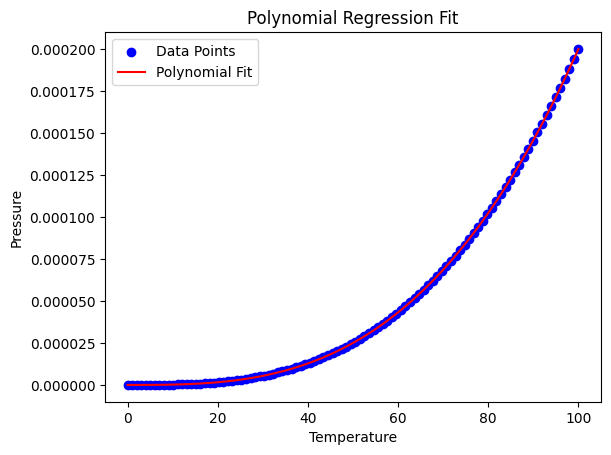

In [46]:
import matplotlib.pyplot as plt
plt.scatter(X, y, color='blue', label='Data Points')
plt.plot(X_range, y_range_pred, color='red', label='Polynomial Fit')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Polynomial Regression Fit')
plt.legend()
plt.show()

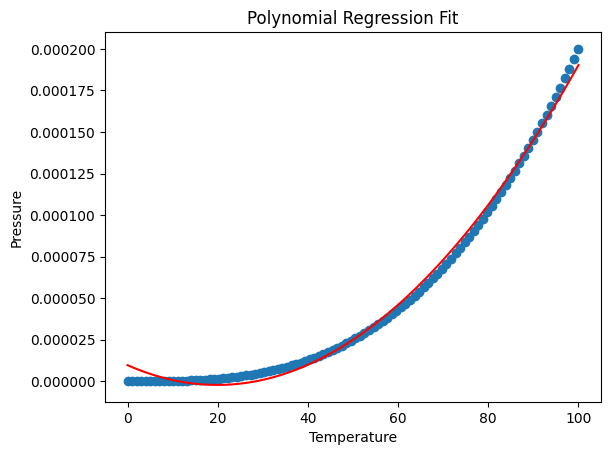

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures    
X = df[['Temperature']]
y = df['Pressure']
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)    
y_pred = model.predict(X_poly)
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.xlabel('Temperature')
plt.ylabel('Pressure')
plt.title('Polynomial Regression Fit')
plt.show()